# **Credit Card Default Prediction using Machine Learning**

By Radyatra Sidharta

## I. Introduction

### a. Table of Content
- I. Introduction
    - a. Table of Content
    - b. Objective
    - c. Conceptual Problems
    - d. Google Cloud Query

- II. Library Import

- III. Data Loading

- IV. Exploratory Data Analysis (EDA)

- V. Data Preprocessing
    - a. Feature Selection
    - b. Dataframe Splitting
    - c. Outlier Handling
    - d. Splitting Dataframe between Independent Variable "X" (Features) and Dependent Variable "y" (Target)

- VI. Model Definition
    - a. Logistic Regression
    - b. Support Vector Machines (SVM)
    - c. Decision Tree
    - d. Random Forest
    - e. K-Nearest Neighbors (KNN)
    - f. Naive Bayes
    - g. AdaBoost

- VII. Model Training
    - a. Logistic Regression
    - b. Support Vector Machines (SVM)
    - c. Decision Tree
    - d. Random Forest
    - e. K-Nearest Neighbors (KNN)
    - f. Naive Bayes
    - g. AdaBoost

- VIII. Model Evaluation
    - a. Logistic Regression
    - b. Support Vector Machines (SVM)
    - c. Decision Tree
    - d. Random Forest
    - e. K-Nearest Neighbors (KNN)
    - f. Naive Bayes
    - g. AdaBoost

- IX. Model Improvement
- X. Model Inference
- XI. Conclusion
- XII. Conceptual Problems

### b. Objective

Create a Classification model to predict credit card default using given dataset.

### c. Google Cloud Query

SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month 
FROM `bigquery-public-data.ml_datasets.credit_card_default` 
LIMIT 29955


## II. Library Import

In [23]:
# Define Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import phik

import warnings
warnings.filterwarnings('ignore')

# For EDA
from statistics import mode

# For Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split

# Calculate the Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Split between Train-Set and Test-Set
from sklearn.model_selection import train_test_split

# To Evaluate and Improve Models
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

## III. Data Loading

In [24]:
# Loading the csv file using pd.read.
df = pd.read_csv('data.csv')
df

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,0,0,0,0,...,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,...,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,...,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,...,19837,19855,20151,1367,1606,692,709,721,692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000,2,2,1,39,-1,-1,-1,-1,-2,...,0,0,12000,0,28428,0,0,12000,33664,0
2961,280000,2,1,1,41,2,-1,-1,-1,-2,...,0,0,244,6859,486,0,0,244,0,0
2962,80000,1,1,2,28,1,-1,-1,-1,-2,...,0,0,0,47,207,0,0,0,0,0
2963,200000,1,2,1,53,1,-1,-1,-2,-2,...,0,0,6753,2920,0,0,0,6753,0,1


The dataframe above describes entries of credit card users, in which data regarding their montly repayment status, monthly bill statements, and monthly past payments are put into focus. With additional personal information on the card holders inputted as well, we are required to create a Supervised Machine Learning model that can predict whether or not a specific customer would default on their next monthly payment. 

Defaulting is defined as an occurence where a borrower / loanee stops making the required payments on a debt.

Reference: https://bit.ly/3Bmnp6n

We have as much as 2965 data entries for each of our 24 columns.

## IV. Exploratory Data Analysis (EDA)

The target output (dependent variable) of our model is binary, meaning it only has two states No or Yes (0 or 1). Therefore, this is identified as classification problem. Hence, we will be using Supervised Classification Machine Learning as well as Ensemble Learning models.

However, before we dive into the creation of the model, we must first explore and analyze the data to look for patterns and the kind that would help us in identifying key parameters to be used.

In [25]:
# Identifying types of data for each column (which are our independent variables) in our dataframe.
df.dtypes

limit_balance                 int64
sex                           int64
education_level               int64
marital_status                int64
age                           int64
pay_0                         int64
pay_2                         int64
pay_3                         int64
pay_4                         int64
pay_5                         int64
pay_6                         int64
bill_amt_1                    int64
bill_amt_2                    int64
bill_amt_3                    int64
bill_amt_4                    int64
bill_amt_5                    int64
bill_amt_6                    int64
pay_amt_1                     int64
pay_amt_2                     int64
pay_amt_3                     int64
pay_amt_4                     int64
pay_amt_5                     int64
pay_amt_6                     int64
default_payment_next_month    int64
dtype: object

At a glance, we could determine that none of our independent variables (henceforth called "Features") are that of object / string type (meaning Non-Numbers). Therefore, we could define that they are all numerical in form and are discrete (int64 / integer types are most likely discrete numbers). To reinforce the idea that these numerical values are indeed discrete, we could take another look at the dataframe.

In [26]:
df_eda = df[['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'default_payment_next_month']]

In [27]:
def pie_plot(df_eda, variable):
    fig, ax = plt.subplots()
    df_eda.groupby('default_payment_next_month')[variable].sum().plot(kind='pie', y='Class', autopct='%1.0f%%')
    fig.patch.set_facecolor('xkcd:white')

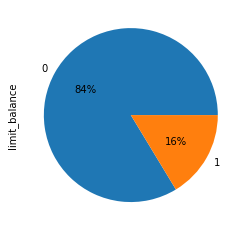

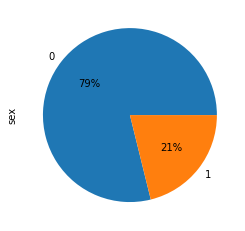

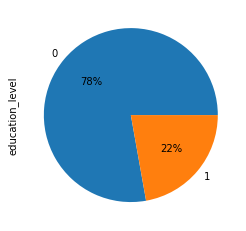

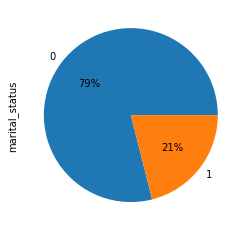

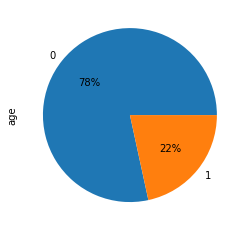

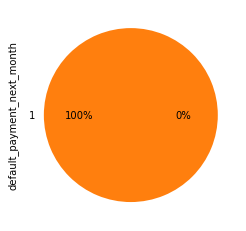

In [28]:
for variable in df_eda.columns:
    pie_plot(df_eda,variable)

In [29]:
# Displaying first five entries (for all columns) in dataframe.
df.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,0,0,0,0,...,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,...,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,...,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,...,19837,19855,20151,1367,1606,692,709,721,692,0


The inputs in our dataframe are indeed whole numbers. Even though here we are talking about monetary values, in which having decimal points is possible, the data keeper seem to be determined in rounding / making numbers whole. Hence, using a Classification model is possible.

In [30]:
# Using .isnull to find any NaN (Not a Number) / Nulls (Zeros) in our data.
df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

NaN (Not a Number) / Null values are a nuisance when it comes to creating a Machine Learning model. They would need to be handled at the first oppurtunity for our model to be able to learn and predict using our dataframe. Using the syntax above, we could ascertain that there are no NaN / Null values in our data.

In [31]:
# .describe is used to find the central tendency of our data as well as the minimum and maximum.
df.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,...,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,...,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,...,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


For now, none of the features we have seem to be out of the ordinary. Hence, we can move to Data Preprocessing.

## V. Data Preprocessing

Data preprocessing in Machine Learning refers to the technique of preparing (cleaning and organizing) the raw data to make it suitable for a building and training Machine Learning models (or into an understandable and readable format for our model).

Reference: https://bit.ly/3RN8vNA

### a. Feature Selection

Logistic Regression and SVM Model Assumptions:

1. The target variable is binary
2. It assumes the entries to be independent of each other (no duplicates).
3. There is a linear relationship between the independent variable (features) and dependent variable (target).
4. It assumes that there is minimal or no multicollinearity among the independent variables (features).
5. It usually requires a large sample size to predict properly.

Decision Tree Model Assumptions:

1. Initially, whole training data is considered as root.
2. Records are distributed recursively on the basis of the attribute value.

Random Forest Model Assumption:

1. Assumption of no formal distributions. Being a non-parametric model, it can handle skewed and multi-modal data.

K-Nearest Neighbors (KNN) Model Assumptions:

1. The data is in feature space, which means data in feature space can be measured by distance metrics such as Manhattan, Euclidean, etc.
2. Each of the training data points consists of a set of vectors and a class label associated with each vector.
3. Desired to have ‘K’ as an odd number in case of 2 class classification.

Naive Bayes Model Assumption:

1. Conditional independence.

Reference: https://bit.ly/3qNwe4y & https://bit.ly/3BuRhhg

In [32]:
df['default_payment_next_month'].unique()

array([0, 1], dtype=int64)

Binary is defined as being related to only two things. In this case, our target variable is considered binary for it only has two states: that of being 0 and that of being 1.

In [33]:
# Checking for duplicates in data.
df_dupl = df.duplicated()
df_dupl.sort_values(ascending=False) # Sorting so that duplicated values will be on top.

2245     True
0       False
1969    False
1971    False
1972    False
        ...  
990     False
991     False
992     False
993     False
2964    False
Length: 2965, dtype: bool

We have one data entry that is a duplicate. However, it does not warrant any changes. Therefore, we will leave it be.

Text(0.5, 1.0, 'Correlation Heatmap')

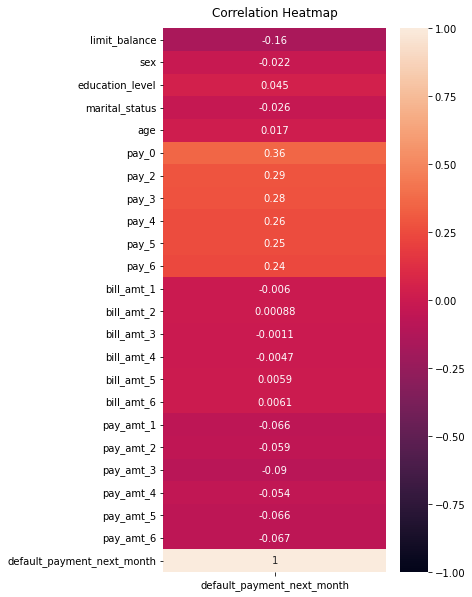

In [34]:
# Check correlation of features to target.

plt.figure(figsize=(5, 10)) # Configuring figure size in X and Y axis.
heatmap = sns.heatmap(df.corr()[['default_payment_next_month']], vmin=-1, vmax=1, annot=True) # default_payment_next_month as target
# (column in which features are being checked for correlation to). vmin and vmax set to default correlation coefficient values (-1 and 1).
# This is the range in which our features will fall upon.

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12) # Setting figure title and fontsize.

The value of the correlation coefficient can take any values from -1 to 1.

- If the value is 1, it is said to be a positive correlation between two variables. This means that when one variable increases, the other variable also increases.
- If the value is -1, it is said to be a negative correlation between the two variables. This means that when one variable increases, the other variable decreases.
- If the value is 0, there is no correlation between the two variables. This means that the variables changes in a random manner with respect to each other.

Reference: https://bit.ly/3BVHG4u

In short, we will consider retaining a feature if their correlation coefficient nears -1 or 1. In our case, pay_0 has the best correlation coefficient, which means that it has the most effect on our target (default_payment_next_month). However, we must also consider that pay_2 until pay_6 catches the eye as well as it bears a resemblance to pay_0 in terms of the correlation coefficient value (even though it is weaker than pay_0). Limit_balance may also be considered since its value is the closest to -1. Nevertheless, we will be looking at another visualization (in the form of a Phik Matrix) to make a more informed decision.

interval columns not set, guessing: ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment_next_month']


<AxesSubplot:>

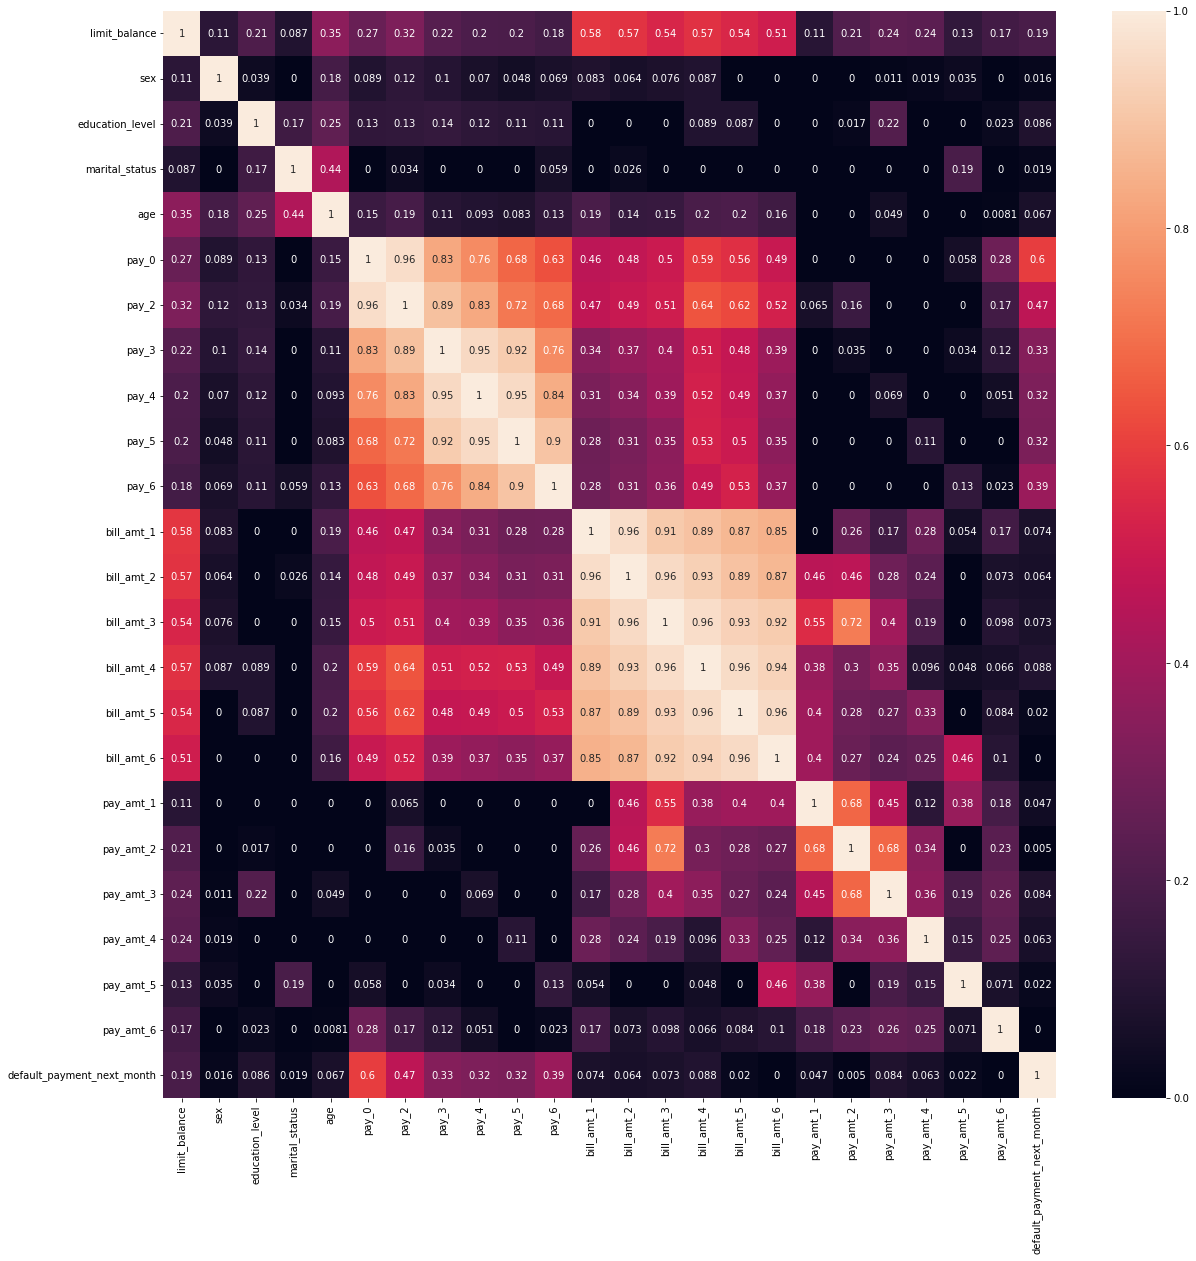

In [35]:
# Spawning of Phik Matrix.
plt.figure(figsize=(20, 20)) # Figure size.
sns.heatmap(df.phik_matrix(), vmin = 0, vmax = 1, annot = True) # In this case, our range for the correlation coefficient is 0 to 1.

Features such from limit balance until age speak for themselves in terms of description. However, others require elaboration: 

- Pay_0 until pay_6 discusses credit card repayment status per month. Pay_6 is for the month of April, and as we approach pay_0, we are reaching the current month (in this case pay_0 is September). As such:
    - pay_6 = April
    - pay_5 = May
    - pay_4 = June
    - pay_3 = July
    - pay_2 = August
    - pay_0 = September

- Bill_amt_1 until bill_amt_6 discusses the monthly amount of bill statement for the credit card (in Dollars). Timeframe is the same as for repayment status:
    - bill_amt_6 = April
    - bill_amt_5 = May
    - bill_amt_4 = June
    - bill_amt_3 = July
    - bill_amt_2 = August
    - bill_amt_1 = September

- Pay_amt_1 until pay_amt_6 discusses the monthly amount of previous payment for the credit card (in Dollars). Timeframe is the same:
    - pay_amt_6 = April
    - pay_amt_5 = May
    - pay_amt_4 = June
    - pay_amt_3 = July
    - pay_amt_2 = August
    - pay_amt_1 = September

- Default_payment_next_month discusses whether a customer would be defaulting their credit card repayment for the next billing.

Phik Matrix interpretation:
- Correlation coefficients between 0.9 and 1.0 = Very high correlation
- Correlation coefficients between 0.7 and 0.9 = High correlation
- Correlation coefficients between 0.5 and 0.7 = Moderate correlation
- Correlation coefficients between 0.3 and 0.5 = Low correlation
- Correlation coefficients below 0.3 = Weak to no correlation

Reference: https://bit.ly/3f1UPQh

In our case, we will have a threshold of 0.3 and consider retaining features that fall above this value. Considering that, we can conclude that pay_0 until pay_6 fall into this category. In addition, the correlation heatmap prior to the Phik Matrix also reinforces the idea that these features should be chosen for our model. Therefore, we will retain them.

In [36]:
# Selecting used features.
df1 = df[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default_payment_next_month']]

In truth, we may choose features purely based on logic and cognition. When we consider the dataframe we have, it would seem that all the features in it could be crucial in the training of our model. However, it is not recommended that we retain all of these features, as it may lead to longer training times and larger loads on our hardware / computer resource. As such, we can turn to heatmaps, matrices (such as those above), and other ways to select the most important and worthwhile features. One of these additional procedures will be applied next.

In [37]:
# Checking Variance Inflation Factor (VIF)
vif_test = df1[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']] # Defining vif_test.
vif_data = pd.DataFrame()
vif_data["Feature"] = vif_test.columns # Creating column "Feature" in vif_data where it is equal to the entries in vif_test.

# Creating column "VIF" in vif_data where it is equal to the VIF values of each columns in vif_test.
vif_data["VIF"] = [variance_inflation_factor(vif_test.values, i) 
                          for i in range(len(vif_test.columns))]
  
print(vif_data) # Printing of results.

  Feature       VIF
0   pay_0  1.833943
1   pay_2  3.114754
2   pay_3  3.402296
3   pay_4  4.084130
4   pay_5  4.809770
5   pay_6  3.179724


The Variance Inflation Factor (VIF) is used to detect multicollinearity between variables. In this case, we are checking the multicollinearity between the features (correlation between our features) that we have retained. A rule of thumb for interpreting the VIF:

- 1 = Not correlated
- Between 1 and 5 = Moderately correlated
- Greater than 5 = Highly correlated

Reference: https://bit.ly/3f54fdK

It is recommended, for Machine Learning models, that our features do not have correlation to each other. However, for the specific models we are using, a moderate correlation between features is still considered acceptable. Therefore, we shall proceed with all of them. In addition, we will not be checking the cardinality (count of distinct values) in our features since they are numerical.

### b. Dataframe Splitting

In [38]:
# Defining X
X = df1

# Splitting dataframe between Train Set and Test Set
df_train, df_test = train_test_split(X, test_size=0.3, random_state=20)

# "Test_size = 0.3" means that we are splitting the dataframe by a ratio of 70 % (for train set) - 30 % (for test set). Random state (seed) defined as 20. 

print('Train Size : ', df_train.shape)
print('Test Size  : ', df_test.shape)

Train Size :  (2075, 7)
Test Size  :  (890, 7)


It is crucial to split the dataframe between a train and test set. The train set will be the basis of our model in which our model learns how to predict the desired outcome. The test set, as it name suggest, would be used to test how the model performs. It is important to do this splitting as early as possible to prevent data leakage. Data leakage is a situation whereas the model has managed to encounter the same problem in the test set as it is given the train set. Thefore, the output it provides, although accurate / correct, would not reflect the realistic performance of the model. This problem becomes more apparent when our model meets real-time / live data.

### c. Outlier Handling (Train Set Only)

In [39]:
# Function to create histogram and boxplot.

def diagnostic_plots(df_train, variable):
    # Defining Figure Size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_train[variable], bins=30) # This syntax takes the specific columns for a dataframe into the graph.
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(df_train[variable])
    plt.title('Boxplot')

    plt.show() # Displaying Plot

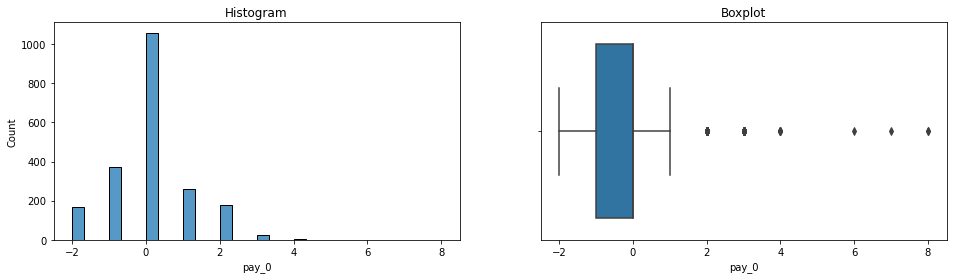


Skewness Value :  0.8743138192291632


In [40]:
# Displaying histogram, boxplot, and skewness for "pay_0."

diagnostic_plots(df_train, 'pay_0') # Using the definition above and inputting the dataframe name and variable (column name / feature).
print('\nSkewness Value : ', df_train['pay_0'].skew()) # Printing the skewness.

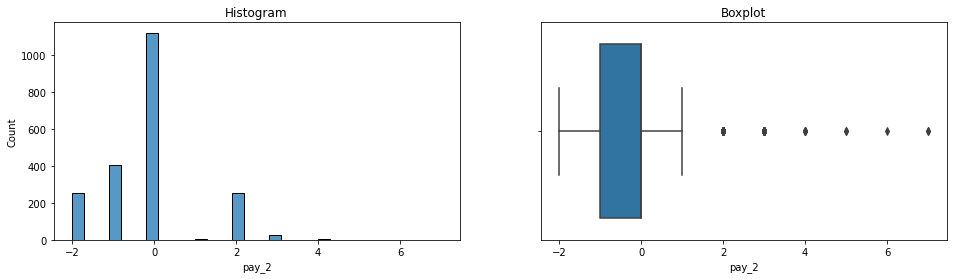


Skewness Value :  0.8523811028285475


In [41]:
# Displaying histogram, boxplot, and skewness for "pay_2."

diagnostic_plots(df_train, 'pay_2')
print('\nSkewness Value : ', df_train['pay_2'].skew())

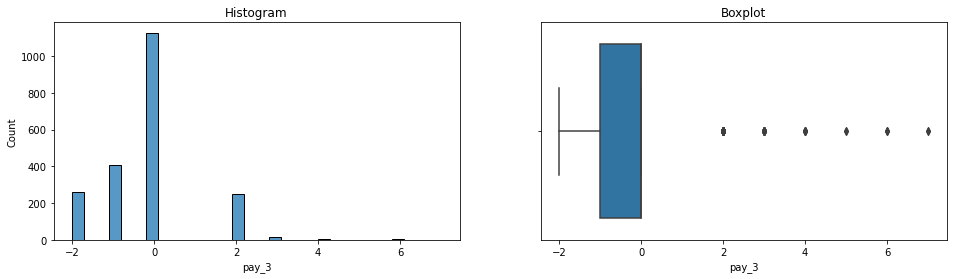


Skewness Value :  0.9507137763110725


In [42]:
# Displaying histogram, boxplot, and skewness for "pay_3."

diagnostic_plots(df_train, 'pay_3')
print('\nSkewness Value : ', df_train['pay_3'].skew())

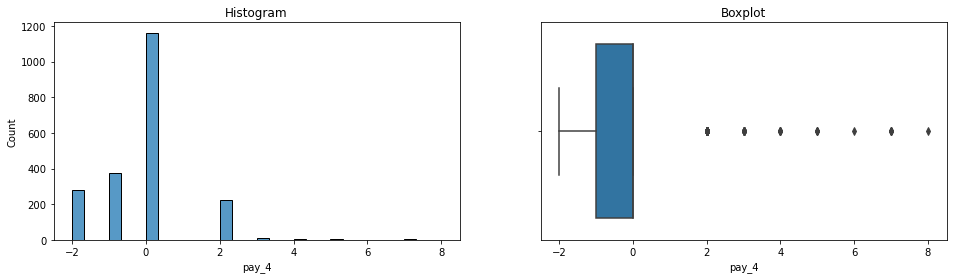


Skewness Value :  1.226656284027715


In [43]:
# Displaying histogram, boxplot, and skewness for "pay_4."

diagnostic_plots(df_train, 'pay_4')
print('\nSkewness Value : ', df_train['pay_4'].skew())

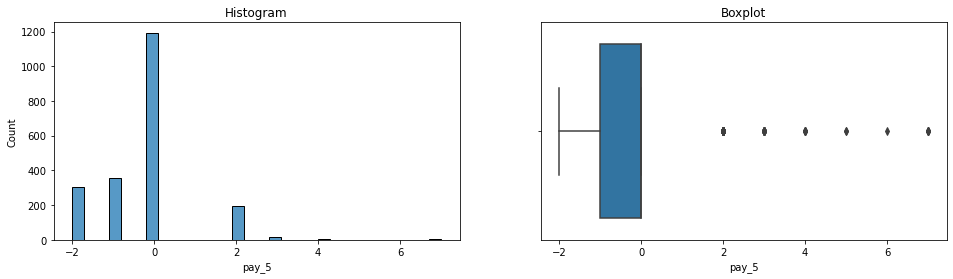


Skewness Value :  1.1742713988518516


In [44]:
# Displaying histogram, boxplot, and skewness for "pay_5."

diagnostic_plots(df_train, 'pay_5')
print('\nSkewness Value : ', df_train['pay_5'].skew())

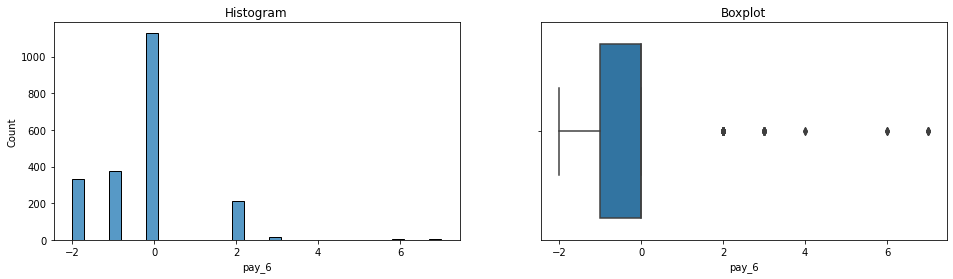


Skewness Value :  1.0697892957906205


In [45]:
# Displaying histogram, boxplot, and skewness for "pay_6."

diagnostic_plots(df_train, 'pay_6')
print('\nSkewness Value : ', df_train['pay_6'].skew())

Note that a skewness value of 0 to 0.5 or 0 to -0.5 means that are our data is assumed to be normally distributed. A value of 0.5 to 1 or -0.5 to -1 means that our data is moderately skewed. A value beyond 1 or -1 means that our data is highly skewed.

In our case, we could see that our data is either moderately skewed, or highly skewed (all in the positive direction / to the right). However, we are considering that values in features pay_0 until pay_6 are a result of categorical values being encoded into numerical values (with range of -2 to 8). Hence, we will not be removing or censoring any outliers. 

To elaborate, this is what pay_0 until pay_6 contains, and its meanings (according to Google Cloud BigQuery schematic for this dataframe):

- -2 = Unknown
- -1 = Pay duly
- 0 = Unknown
- 1 = Payment delay for one month
- 2 = Payment delay for two months
- 3 = Payment delay for three months
- 4 = Payment delay for four months
- 5 = Payment delay for five months
- 6 = Payment delay for six months
- 7 = Payment delay for seven months
- 8 = Payment delay for eight months
- 9 = Payment delay for nine months and above

There are two unknown categories in this case. We will assume that -2 is considered pay duly as well, whilst 0 is pending payment.

Since the features we have contains values / entries that we consider are encoded categorical values, we will not be scaling them as well.

### d. Splitting Dataframe between Independent Variable "X" (Features) and Dependent Variable "y" (Target)

In [46]:
X_train = df_train.drop('default_payment_next_month', axis=1) # For X, we are using ".drop" and "axis=1" to drop all values within the "default_payment_next_month" column.
X_test = df_test.drop('default_payment_next_month', axis=1)

y_train = df_train[['default_payment_next_month']] # We are only retaining the "default_payment_next_month" column for y.
y_test = df_test[['default_payment_next_month']]

This is the final procedure in out data preprocessing step where we split the train and test sets between the features and target. This is required for our models to function.

## VI. Model Definition

### a. Logistic Regression

In [47]:
# Defining Logistic Regression Model with default attributes.
log_model = LogisticRegression()

In [48]:
# Defining X_train, X_test, y_train, and y_test for Logistic Regression model.
X_train_log = X_train
X_test_log = X_test
y_train_log = y_train
y_test_log = y_test

### b. Support Vector Machines (SVM)

In [49]:
# Defining SVM Classifier Model with default attributes.
svm = SVC(probability=True)

In [50]:
# Defining X_train, X_test, y_train, and y_test for Support Vector Machines (SVM) model.
X_train_svm = X_train
X_test_svm = X_test
y_train_svm = y_train
y_test_svm = y_test

### c. Decision Tree

In [51]:
# Defining Decision Tree model with default attributes. We are using random_state=20 here to prevent changes in output when the code is re-runned.
tree_clf = DecisionTreeClassifier(random_state=20)

In [52]:
# Defining X_train, X_test, y_train, and y_test for Decision Tree model.
X_train_tree = X_train
X_test_tree  = X_test
y_train_tree  = y_train
y_test_tree = y_test

### d. Random Forest

In [53]:
# Defining Random Tree model with default attributes. We are using random_state=20 here to prevent changes in output when the code is re-runned.
rnd_clf = RandomForestClassifier(random_state=20)

In [54]:
# Defining X_train, X_test, y_train, and y_test for Random Forest model.
X_train_rnd = X_train
X_test_rnd  = X_test
y_train_rnd  = y_train
y_test_rnd = y_test

### e. K-Nearest Neighbors (KNN)

In [55]:
# Defining KNN model with default attributes.
neigh = KNeighborsClassifier()

In [56]:
# Defining X_train, X_test, y_train, and y_test for KNN model.
X_train_neigh = X_train
X_test_neigh  = X_test
y_train_neigh  = y_train
y_test_neigh = y_test

### f. Naive Bayes

In [57]:
# Defining Naive Bayes (Gaussian) model with default attributes.
gnb = GaussianNB()

In [58]:
# Defining X_train, X_test, y_train, and y_test for Naive Bayes model.
X_train_gnb = X_train
X_test_gnb  = X_test
y_train_gnb  = y_train
y_test_gnb = y_test

### g. AdaBoost

In [59]:
# Defining AdaBoost model with default attributes. We are using random_state=20 here to prevent changes in output when the code is re-runned.
ada_clf = AdaBoostClassifier(random_state=20)

In [60]:
# Defining X_train, X_test, y_train, and y_test for Naive Bayes model.
X_train_ada = X_train
X_test_ada  = X_test
y_train_ada  = y_train
y_test_ada = y_test

## VII. Model Training

### a. Logistic Regression

In [61]:
# Training Logistic Regression model.
log_model.fit(X_train_log,y_train_log)

LogisticRegression()

### b. Support Vector Machines (SVM)

In [62]:
# Training SVM model.
svm.fit(X_train_svm, y_train_svm)

SVC(probability=True)

### c. Decision Tree

In [63]:
tree_clf.fit(X_train_tree, y_train_tree)

DecisionTreeClassifier(random_state=20)

### d. Random Forest

In [64]:
rnd_clf.fit(X_train_rnd, y_train_rnd)

RandomForestClassifier(random_state=20)

### e. K-Nearest Neighbors (KNN)

In [65]:
neigh.fit(X_train_neigh, y_train_neigh)

KNeighborsClassifier()

### f. Naive Bayes

In [66]:
gnb.fit(X_train_gnb,y_train_gnb)

GaussianNB()

### g. AdaBoost

In [67]:
ada_clf.fit(X_train_ada, y_train_ada)

AdaBoostClassifier(random_state=20)

## VIII. Model Evaluation

### a. Logistic Regression

In [324]:
# Syntax used to find the probability in of where our predicted outcome will land on (0 [not default payment] or 1 [default payment]).
# There are two output for each data entry / value, one for probability that outcome will be 0, and the other probability it will be 1.
# Both outputs are in percentages.

y_train_log_prob = log_model.predict_proba(X_train_log)
y_test_log_prob = log_model.predict_proba(X_test_log)

In [325]:
# Similar to predict_proba, this syntax is used to find the outcome of our prediction for each data entry / value
# (output will be either 0 [not default payment] or 1 [default payment]).

y_pred_train_log = log_model.predict(X_train_log)
y_pred_test_log = log_model.predict(X_test_log)

References for predict_proba and predict: 
- https://bit.ly/3SjoVgG
- https://bit.ly/3S0osjF

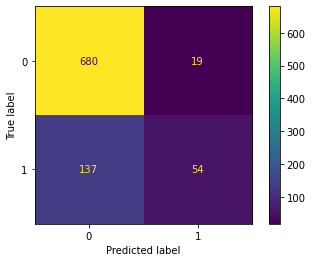

In [326]:
# A confusion matrix is a summary of prediction results on a classification problem.
# The number of correct and incorrect predictions are summarized with count values and broken down by each class.

cm_log = confusion_matrix(y_test_log, y_pred_test_log, labels=log_model.classes_)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log,display_labels=log_model.classes_)

disp_log.plot()
plt.show()

# Reference: https://bit.ly/3QUJkaN

The Logistic Regression model could have an predicting outcome of 680 True Negatives (0), 54 True Positives (1), and a False Negative and False Positive of 137 and 19 respectively.

In [327]:
# Printing Classification report for our Train Set.
print(classification_report(y_train_log,y_pred_train_log))
print('Train ROC-AUC Score: ', roc_auc_score(y_train_log, y_train_log_prob[:,1]))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1631
           1       0.79      0.33      0.46       444

    accuracy                           0.84      2075
   macro avg       0.82      0.65      0.68      2075
weighted avg       0.83      0.84      0.81      2075

Train ROC-AUC Score:  0.7329520661065725


In [328]:
# Printing Classification report for our Test Set.
print(classification_report(y_test_log,y_pred_test_log))
print('Test ROC-AUC Score: ', roc_auc_score(y_test_log, y_test_log_prob[:,1]))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90       699
           1       0.74      0.28      0.41       191

    accuracy                           0.82       890
   macro avg       0.79      0.63      0.65       890
weighted avg       0.81      0.82      0.79       890

Test ROC-AUC Score:  0.7569527147982533


For the Classification Report, it is important we look to that of the Test set, with the Train set present as additional information. The following is the interpretation of the classification report:

- For all scores except support, the range of the output is 0 - 1.
- The closer the Precision is to the value 1, the lesser the False Positive is.
- The closer the Recall is to the value 1, the lesser the False Negative is.
- F1 Score is the weighted harmonic mean of precision and recall. The closer to 1, the better the model.

    F1 Score: 2 * (Precision * Recall) / (Precision + Recall)

- Support describes how many data entries belonged to each class (0 or 1) in the dataset.

The ROC-AUC score tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.

We will have to note that there are different definitions when it comes to the confusion matrix and the classification report. In the confusion matrix, the class 0 is considered to be a negative, and the class 1 positive. This notion is fixed. On the other hand, in the classification report, we could see two rows containing class 0 and class 1. In either case, the "positive" class is whichever row you are looking at. For example, when looking at the precision and recall of class 0, we consider "0" as the positive, and vice-versa.

For our Logistic Regression then, for class 0, we could ascertain that model could predict 680 true positives out of a total of 817 predictions (137 predictions being false positive), which attributes to 0.83 / 83% precision. In addition, it could predict 680 true positives out of a total of 699 predictions (19 being false negative), which attributes to 0.97 / 97% recall.

On the other hand, for class 1, the model could predict 54 true positives out of a total of 73 predictions (19 predictions being false positive), which attributes to 0.74 / 74% precision. In addition, it could predict only 54 out of a total of 191 predictions (137 predictions being false negative), which attributes to a poor 0.28 / 28% recall.

Precision and recall is looked upon in specific cases. For example, in our case, there would be an infliction of financial lost if we are to accidentally not default a customer's credit card when in fact he / she has not yet paid the previous monthly bill(s). In such a case, we will be focusing on the recall for class 1 (which is 28% for the Logistic Regression). However, the same could be said of the opposite scenario. Having default a customer's credit card by accident, when in fact he / she has paid previous monthly bill(s) could damage our customer relations, and we risk losing them as well. In such a case, we should be focusing on the recall for class 0. Therefore, we will be focusing on the recalls for both class 0 and 1 for our dataset.

F1-Score is used when we focus on both precision and recall of our dataset. Since we are only using recall, we will not be using f1-score.

The Support describes the degree of imbalance of our classes where if the count for one class of outcome is only 20 - 40% of the other, it is considered to be a mild imbalance. If the it is 1 - 20%, then it is moderately imbalanced. If the imbalance falls below 1%, then it is considered extreme. In most cases, we would have to handle this imbalance if it falls on the extreme category. For our dataset however, we have a mild imbalance of about 27%, in which there are 1631 entries that have an outcome of 0 and 444 entries that have an outcome of 1 for our Logistic Regression Train set. For the Test set, there are 699 entries that have an outcome of 0 and 191 entries that have an outcome of 1.

The Accuracy is defined as a ratio of correctly predicted observation to the total observations. It is used only when there is a balance between classes in our dataset. Since our dataset is imbalanced, we will not be using accuracy.

The ROC-AUC Score in our case would only be used to ascertain the fit of our model.

As such, looking at the Test Set for the Logistic Regression Model, we could conclude that:

- Class 0 Recall is 0.97 / 97%
- Class 1 Recall is 0.28 / 28%
- Dataset is mildly imbalanced at 27%
- ROC-AUC score of 73% for Train Set and 76% for Test Set. Assuming that range of 1% determines if model is fit, then we can conclude that this model is underfitting.

For Class 0, a threshold of 50% is assumed for the recall, where a value above 50% makes the model more likely to accurately not default a customer's credit card, whilst a value below 50% makes the model more likely to inaccurately default a customer's credit card. Class 0 has great recall which means that we only risk very little in terms of outlash in customer relations.

For Class 1, we have a very poor recall at 27%. This could be attributed to class imbalance. With it, we risk heavy financial losses from unpaid debt (credit card bills). Additionally, this debt could stack up if the card users keep using the credit card without paying their bills.

### b. Support Vector Machines (SVM)

In [329]:
y_train_svm_prob = svm.predict_proba(X_train_svm)
y_test_svm_prob = svm.predict_proba(X_test_svm)

In [330]:
y_pred_train_svm = svm.predict(X_train_svm)
y_pred_test_svm = svm.predict(X_test_svm)

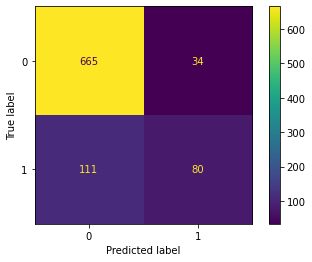

In [331]:
cm_svm = confusion_matrix(y_test_svm, y_pred_test_svm, labels=svm.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm,display_labels=svm.classes_)

disp_svm.plot()
plt.show()

The Support Vector Machines (SVM) could have an predicting outcome of 665 True Negatives (0), 80 True Positives (1), and a False Negative and False Positive of 111 and 34 respectively.

In [332]:
print(classification_report(y_train_svm,y_pred_train_svm))
print('Train ROC-AUC Score: ', roc_auc_score(y_train_svm, y_train_svm_prob[:,1]))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1631
           1       0.76      0.42      0.54       444

    accuracy                           0.85      2075
   macro avg       0.81      0.69      0.73      2075
weighted avg       0.84      0.85      0.83      2075

Train ROC-AUC Score:  0.7329755414519363


In [333]:
print(classification_report(y_test_svm,y_pred_test_svm))
print('Test ROC-AUC Score: ', roc_auc_score(y_test_svm, y_test_svm_prob[:,1]))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       699
           1       0.70      0.42      0.52       191

    accuracy                           0.84       890
   macro avg       0.78      0.69      0.71       890
weighted avg       0.82      0.84      0.82       890

Test ROC-AUC Score:  0.689241923765439


Looking at the Test Set for the SVM Model, we could conclude that:

- Class 0 Recall is 0.95 / 95%
- Class 1 Recall is 0.42 / 42%
- Dataset is again mildly imbalanced at 27%
- ROC-AUC score of 73% for Train Set and 69% for Test Set. Assuming that range of 1% determines if model is fit, then we can conclude that this model is overfitting.

Class 0 has great recall which means that we only risk very little in terms of outlash in customer relations.

Recall in Class 1 is 42%. With it, we risk some financial losses from unpaid debt (credit card bills), and additional debt stacking from card overuse (assuming customers would still not settle bills).

### c. Decision Tree

In [334]:
y_train_tree_prob = tree_clf.predict_proba(X_train_tree)
y_test_tree_prob = tree_clf.predict_proba(X_test_tree)

In [335]:
y_pred_train_tree = tree_clf.predict(X_train_tree)
y_pred_test_tree = tree_clf.predict(X_test_tree)

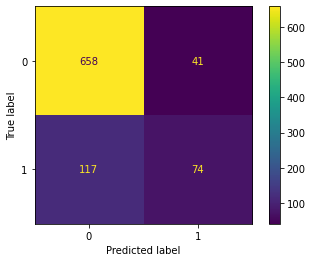

In [336]:
cm_tree = confusion_matrix(y_test_tree, y_pred_test_tree, labels=tree_clf.classes_)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree,display_labels=tree_clf.classes_)

disp_tree.plot()
plt.show()

The Decision Tree model could have an predicting outcome of 658 True Negatives (0), 74 True Positives (1), and a False Negative and False Positive of 117 and 41 respectively.

In [337]:
print(classification_report(y_train_tree,y_pred_train_tree))
print('Train ROC-AUC Score: ', roc_auc_score(y_train_tree, y_train_tree_prob[:,1]))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1631
           1       0.85      0.48      0.61       444

    accuracy                           0.87      2075
   macro avg       0.86      0.73      0.77      2075
weighted avg       0.87      0.87      0.85      2075

Train ROC-AUC Score:  0.8467467314033839


In [338]:
print(classification_report(y_test_tree,y_pred_test_tree))
print('Test ROC-AUC Score: ', roc_auc_score(y_test_tree, y_test_tree_prob[:,1]))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       699
           1       0.64      0.39      0.48       191

    accuracy                           0.82       890
   macro avg       0.75      0.66      0.69       890
weighted avg       0.80      0.82      0.81       890

Test ROC-AUC Score:  0.7134837351789017


Looking at the Test Set for the Decision Tree Model, we could conclude that:

- Class 0 Recall is 0.94 / 94%
- Class 1 Recall is 0.39 / 39%
- Dataset is mildly imbalanced at 27%
- ROC-AUC score of 85% for Train Set and 71% for Test Set. Assuming that range of 1% determines if model is fit, then we can conclude that this model is overfitting.

Class 0 has great recall which means that we only risk very little in terms of outlash in customer relations.

We risk financial losses from poor recall in Class 1.

### d. Random Forest

In [339]:
y_train_rnd_prob = rnd_clf.predict_proba(X_train_rnd)
y_test_rnd_prob = rnd_clf.predict_proba(X_test_rnd)

In [340]:
y_pred_train_rnd = rnd_clf.predict(X_train_rnd)
y_pred_test_rnd = rnd_clf.predict(X_test_rnd)

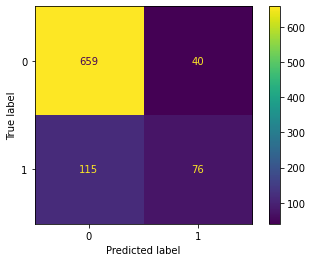

In [341]:
cm_rnd = confusion_matrix(y_test_rnd, y_pred_test_rnd, labels=rnd_clf.classes_)
disp_rnd = ConfusionMatrixDisplay(confusion_matrix=cm_rnd,display_labels=rnd_clf.classes_)

disp_rnd.plot()
plt.show()

The Random Forest model could have an predicting outcome of 659 True Negatives (0), 76 True Positives (1), and a False Negative and False Positive of 115 and 40 respectively.

In [342]:
print(classification_report(y_train_rnd,y_pred_train_rnd))
print('Train ROC-AUC Score: ', roc_auc_score(y_train_rnd, y_train_rnd_prob[:,1]))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1631
           1       0.84      0.48      0.61       444

    accuracy                           0.87      2075
   macro avg       0.86      0.73      0.77      2075
weighted avg       0.87      0.87      0.86      2075

Train ROC-AUC Score:  0.8378550991211936


In [343]:
print(classification_report(y_test_rnd,y_pred_test_rnd))
print('Test ROC-AUC Score: ', roc_auc_score(y_test_rnd, y_test_rnd_prob[:,1]))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       699
           1       0.66      0.40      0.50       191

    accuracy                           0.83       890
   macro avg       0.75      0.67      0.69       890
weighted avg       0.81      0.83      0.81       890

Test ROC-AUC Score:  0.7309994082795915


Looking at the Test Set for the Random Forest Model, we could conclude that:

- Class 0 Recall is 0.94 / 94%
- Class 1 Recall is 0.40 / 40%
- Dataset is mildly imbalanced at 27%
- ROC-AUC score of 84% for Train Set and 73% for Test Set. Assuming that range of 1% determines if model is fit, then we can conclude that this model is overfitting.

Class 0 has great recall which means that we only risk very little in terms of outlash in customer relations.

We risk financial losses from poor recall in Class 1.

### e. K-Nearest Neighbors (KNN)

In [344]:
y_train_neigh_prob = neigh.predict_proba(X_train_neigh)
y_test_neigh_prob = neigh.predict_proba(X_test_neigh)

In [345]:
y_pred_train_neigh = neigh.predict(X_train_neigh)
y_pred_test_neigh = neigh.predict(X_test_neigh)

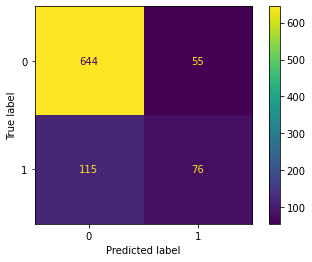

In [346]:
cm_neigh = confusion_matrix(y_test_neigh, y_pred_test_neigh, labels=neigh.classes_)
disp_neigh = ConfusionMatrixDisplay(confusion_matrix=cm_neigh,display_labels=neigh.classes_)

disp_neigh.plot()
plt.show()

The K-Nearest Neighbors (KNN) model could have a predicting outcome of 644 True Negatives (0), 76 True Positives (1), and a False Negative and False Positive of 115 and 55 respectively.

In [347]:
print(classification_report(y_train_neigh,y_pred_train_neigh))
print('Train ROC-AUC Score: ', roc_auc_score(y_train_neigh, y_train_neigh_prob[:,1]))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1631
           1       0.70      0.45      0.55       444

    accuracy                           0.84      2075
   macro avg       0.78      0.70      0.73      2075
weighted avg       0.83      0.84      0.83      2075

Train ROC-AUC Score:  0.7648509177479135


In [348]:
print(classification_report(y_test_neigh,y_pred_test_neigh))
print('Test ROC-AUC Score: ', roc_auc_score(y_test_neigh, y_test_neigh_prob[:,1]))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       699
           1       0.58      0.40      0.47       191

    accuracy                           0.81       890
   macro avg       0.71      0.66      0.68       890
weighted avg       0.79      0.81      0.80       890

Test ROC-AUC Score:  0.7164910230770959


Looking at the Test Set for the KNN Model, we could conclude that:

- Class 0 Recall is 0.92 / 92%
- Class 1 Recall is 0.40 / 40%
- Dataset is mildly imbalanced at 27%
- ROC-AUC score of 77% for Train Set and 72% for Test Set. Assuming that range of 1% determines if model is fit, then we can conclude that this model is overfitting.

Class 0 has great recall which means that we only risk very little in terms of outlash in customer relations.

We risk financial losses from poor recall in Class 1.

### f. Naive Bayes

In [69]:
y_train_gnb_prob = gnb.predict_proba(X_train_gnb)
y_test_gnb_prob = gnb.predict_proba(X_test_gnb)

In [70]:
y_pred_train_gnb = gnb.predict(X_train_gnb)
y_pred_test_gnb = gnb.predict(X_test_gnb)

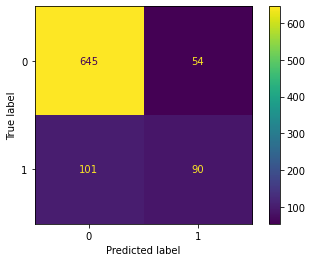

In [71]:
cm_gnb = confusion_matrix(y_test_gnb, y_pred_test_gnb, labels=gnb.classes_)
disp_gnb = ConfusionMatrixDisplay(confusion_matrix=cm_gnb,display_labels=gnb.classes_)

disp_gnb.plot()
plt.show()

The Naive Bayes model could have a predicting outcome of 645 True Negatives (0), 90 True Positives (1), and a False Negative and False Positive of 101 and 54 respectively.

In [72]:
print(classification_report(y_train_gnb,y_pred_train_gnb))
print('Train ROC-AUC Score: ', roc_auc_score(y_train_gnb, y_train_gnb_prob[:,1]))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1631
           1       0.58      0.43      0.50       444

    accuracy                           0.81      2075
   macro avg       0.72      0.67      0.69      2075
weighted avg       0.80      0.81      0.80      2075

Train ROC-AUC Score:  0.7407962837147387


In [73]:
print(classification_report(y_test_gnb,y_pred_test_gnb))
print('Test ROC-AUC Score: ', roc_auc_score(y_test_gnb, y_test_gnb_prob[:,1]))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       699
           1       0.62      0.47      0.54       191

    accuracy                           0.83       890
   macro avg       0.74      0.70      0.72       890
weighted avg       0.81      0.83      0.82       890

Test ROC-AUC Score:  0.7695061756136289


Looking at the Test Set for the Naive Bayes Model, we could conclude that:

- Class 0 Recall is 0.92 / 92%
- Class 1 Recall is 0.47 / 47%
- Dataset is mildly imbalanced at 27%
- ROC-AUC score of 74% for Train Set and 77% for Test Set. Assuming that range of 1% determines if model is fit, then we can conclude that this model is undefitting.

Class 0 has great recall which means that we only risk very little in terms of outlash in customer relations.

We risk financial losses due to poor recall in Class 1.

### g. AdaBoost

In [101]:
y_train_ada_prob = ada_clf.predict_proba(X_train_ada)
y_test_ada_prob = ada_clf.predict_proba(X_test_ada)

In [102]:
y_pred_train_ada = ada_clf.predict(X_train_ada)
y_pred_test_ada = ada_clf.predict(X_test_ada)

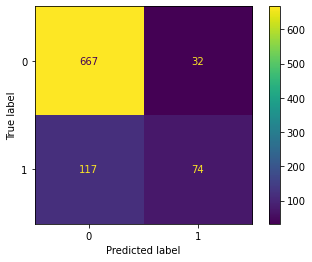

In [103]:
cm_ada = confusion_matrix(y_test_ada, y_pred_test_ada, labels=ada_clf.classes_)
disp_ada = ConfusionMatrixDisplay(confusion_matrix=cm_ada,display_labels=ada_clf.classes_)

disp_ada.plot()
plt.show()

The AdaBoost model could have a predicting outcome of 667 True Negatives (0), 74 True Positives (1), and a False Negative and False Positive of 117 and 32 respectively.

In [104]:
print(classification_report(y_train_ada,y_pred_train_ada))
print('Train ROC-AUC Score: ', roc_auc_score(y_train_ada, y_train_ada_prob[:,1]))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1631
           1       0.75      0.41      0.53       444

    accuracy                           0.84      2075
   macro avg       0.80      0.69      0.72      2075
weighted avg       0.83      0.84      0.83      2075

Train ROC-AUC Score:  0.7635321556995377


In [105]:
print(classification_report(y_test_ada,y_pred_test_ada))
print('Test ROC-AUC Score: ', roc_auc_score(y_test_ada, y_test_ada_prob[:,1]))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       699
           1       0.70      0.39      0.50       191

    accuracy                           0.83       890
   macro avg       0.77      0.67      0.70       890
weighted avg       0.82      0.83      0.81       890

Test ROC-AUC Score:  0.7708881049217657


Looking at the Test Set for the AdaBoost Model, we could conclude that:

- Class 0 Recall is 0.95 / 95%
- Class 1 Recall is 0.39 / 39%
- Dataset is mildly imbalanced at 27%
- ROC-AUC score of 76% for Train Set and 77% for Test Set. Assuming that range of 1% determines if model is fit, then we can conclude that this model is just-fit.

Class 0 has great recall which means that we only risk very little in terms of outlash in customer relations.

We risk financial losses due to poor recall in Class 1.

## IX. Model Improvement

In [90]:
# Cross Validation
# Reference: https://bit.ly/3DCjBAG

# Obtaining Cross-Validation score.
log_cv = cross_val_score(log_model, X_train_log, y_train_log, cv=3, scoring="accuracy")
svm_cv = cross_val_score(svm, X_train_svm, y_train_svm, cv=3, scoring="accuracy")
tree_cv = cross_val_score(tree_clf, X_train_tree, y_train_tree, cv=3, scoring="accuracy")
rnd_cv = cross_val_score(rnd_clf, X_train_rnd, y_train_rnd, cv=3, scoring="accuracy")
neigh_cv = cross_val_score(neigh, X_train_neigh, y_train_neigh, cv=3, scoring="accuracy")
gnb_cv = cross_val_score(gnb, X_train_gnb, y_train_gnb, cv=3, scoring="accuracy")
ada_cv = cross_val_score(ada_clf, X_train_ada, y_train_ada, cv=3, scoring="accuracy")

# Using "For" loop to shorten code for Cross-Validation score calculations.
for cv,name in zip([log_cv, svm_cv, tree_cv, rnd_cv, neigh_cv, gnb_cv, ada_cv],
['Logistic Regression','Support Vector Machines (SVM)','Decision Tree','Random Forest','K-Nearest Neighbors (KNN)','Naive Bayes','AdaBoost']):
    print(name)
    print('Accuracy - All - Cross Validation  : ', cv)
    print('Accuracy - Mean - Cross Validation : ', cv.mean())
    print('Accuracy - Std - Cross Validation  : ', cv.std())
    print('Accuracy - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('')

Logistic Regression
Accuracy - All - Cross Validation  :  [0.82080925 0.82947977 0.84370478]
Accuracy - Mean - Cross Validation :  0.8313312643428167
Accuracy - Std - Cross Validation  :  0.00943830201946827
Accuracy - Range of Test-Set       :  0.8218929623233484 - 0.840769566362285

Support Vector Machines (SVM)
Accuracy - All - Cross Validation  :  [0.8265896  0.84248555 0.83357453]
Accuracy - Mean - Cross Validation :  0.8342165580586065
Accuracy - Std - Cross Validation  :  0.0065053560909218095
Accuracy - Range of Test-Set       :  0.8277112019676847 - 0.8407219141495283

Decision Tree
Accuracy - All - Cross Validation  :  [0.81791908 0.8367052  0.82054993]
Accuracy - Mean - Cross Validation :  0.8250580683659159
Accuracy - Std - Cross Validation  :  0.008305505928224143
Accuracy - Range of Test-Set       :  0.8167525624376918 - 0.83336357429414

Random Forest
Accuracy - All - Cross Validation  :  [0.82803468 0.8367052  0.82633864]
Accuracy - Mean - Cross Validation :  0.83035950

For the Cross-Validation, we are looking at the model with the largest mean and lowest standard deviation. In this case, AdaBoost fits the bill at 0.84 mean and 0.009 standard deviation.

In [91]:
# Train with Grid Search

# Parameters to be tested.
param_grid = {'learning_rate' : [0.001, 0.01, 0.1, 1, 5], 'n_estimators': [10, 20, 50, 70, 100], 'algorithm' : ['SAMME', 'SAMME.R']}

# Defining Model to be used.
ada_gridcv = GridSearchCV(estimator=AdaBoostClassifier(random_state=20), param_grid=param_grid, n_jobs=-1)

# Training dataset.
ada_gridcv.fit(X_train_ada, y_train_ada)

GridSearchCV(estimator=AdaBoostClassifier(random_state=20), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 5],
                         'n_estimators': [10, 20, 50, 70, 100]})

In [92]:
print(ada_gridcv.best_estimator_)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=20,
                   random_state=20)


In [93]:
# Redefining Model
ada2 = AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=20, random_state=20)

In [94]:
# Defining X_train, X_test, y_train, and y_test for Random Forest model.
X_train_ada2 = X_train
X_test_ada2  = X_test
y_train_ada2  = y_train
y_test_ada2 = y_test

In [95]:
# Training AdaBoost model.
ada2.fit(X_train_ada2, y_train_ada2)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=20,
                   random_state=20)

In [106]:
y_train_ada_prob2 = ada2.predict_proba(X_train_ada2)
y_test_ada_prob2 = ada2.predict_proba(X_test_ada2)

In [107]:
y_pred_train_ada2 = ada2.predict(X_train_ada2)
y_pred_test_ada2 = ada2.predict(X_test_ada2)

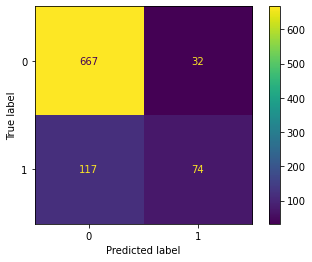

In [108]:
# AdaBoost Model Confusion Matrix before GridSearchCV / Hyperparameter tuning.
disp_ada.plot()
plt.show()

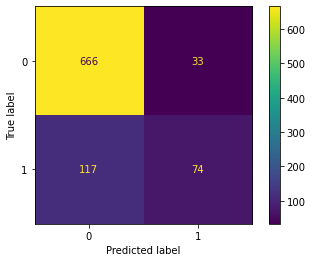

In [109]:
# AdaBoost Model Confusion Matrix after GridSearchCV / Hyperparameter tuning.
cm_ada2 = confusion_matrix(y_test_ada2, y_pred_test_ada2, labels=ada2.classes_)
disp_ada2 = ConfusionMatrixDisplay(confusion_matrix=cm_ada2,display_labels=ada2.classes_)

disp_ada2.plot()
plt.show()

Comparing the two confusion matrix of the AdaBoost model before and after parameter tuning, we can see that the only change is on the True Negative (0), where the value has changed from 667 to 666, whilst the False Positive changed from 33 to 32.

In [110]:
# Before Hyperparameter tuning.
print(classification_report(y_train_ada,y_pred_train_ada))
print('Train ROC-AUC Score: ', roc_auc_score(y_train_ada, y_train_ada_prob[:,1]))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1631
           1       0.75      0.41      0.53       444

    accuracy                           0.84      2075
   macro avg       0.80      0.69      0.72      2075
weighted avg       0.83      0.84      0.83      2075

Train ROC-AUC Score:  0.7635321556995377


In [111]:
# After Hyperparameter tuning.
print(classification_report(y_train_ada2,y_pred_train_ada2))
print('Train ROC-AUC Score: ', roc_auc_score(y_train_ada2, y_train_ada_prob2[:,1]))

              precision    recall  f1-score   support

           0       0.85      0.96      0.91      1631
           1       0.74      0.40      0.52       444

    accuracy                           0.84      2075
   macro avg       0.80      0.68      0.71      2075
weighted avg       0.83      0.84      0.82      2075

Train ROC-AUC Score:  0.7495850387481289


In [112]:
# Before Hyperparameter tuning.
print(classification_report(y_test_ada,y_pred_test_ada))
print('Test ROC-AUC Score: ', roc_auc_score(y_test_ada, y_test_ada_prob[:,1]))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       699
           1       0.70      0.39      0.50       191

    accuracy                           0.83       890
   macro avg       0.77      0.67      0.70       890
weighted avg       0.82      0.83      0.81       890

Test ROC-AUC Score:  0.7708881049217657


In [113]:
# After Hyperparameter tuning.
print(classification_report(y_test_ada2,y_pred_test_ada2))
print('Test ROC-AUC Score: ', roc_auc_score(y_test_ada2, y_test_ada_prob2[:,1]))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       699
           1       0.69      0.39      0.50       191

    accuracy                           0.83       890
   macro avg       0.77      0.67      0.70       890
weighted avg       0.82      0.83      0.81       890

Test ROC-AUC Score:  0.7633268169187097


Comparing the Test Sets for the Naive Bayes Model, we could conclude that:

- Class 0 Recall is 0.95 / 95% for AdaBoost model prior to hyperparameter tuning.
- Class 0 Recall is the same at 0.95 / 95% for AdaBoost model after hyperparameter tuning.
- Class 1 Recall is 0.39 / 39% for AdaBoost model prior to hyperparameter tuning.
- Class 1 Recall is the same at 0.39 / 39% for AdaBoost model after hyperparameter tuning.
- Dataset is mildly imbalanced at 27%
- ROC-AUC score of 76% for Train Set and 77% for Test Set of AdaBoost model prior to hyperparameter tuning. This model is thus just-fit. 
- For AdaBoost model after hyperparameter tuning, the ROC-AUC score is 74.9% for Train Set and 76.3% for Test Set. This model is slightly underfit.

Class 0 has great recall which means that we only risk very little in terms of outlash in customer relations.

We still risk financial losses due to poor recall in Class 1.

## X. Model Inference

In [374]:
# Create Inference Data
inf_trial = pd.DataFrame([[0,0,2,0,0,0], [0,0,0,0,0,6], [1,0,0,0,0,0], [-1,0,0,2,0,0], [-2,0,0,0,0,4], [1,2,3,4,5,6]],
     columns=['pay_0','pay_2','pay_3', 'pay_4', 'pay_5', 'pay_6'])
print(inf_trial)

   pay_0  pay_2  pay_3  pay_4  pay_5  pay_6
0      0      0      2      0      0      0
1      0      0      0      0      0      6
2      1      0      0      0      0      0
3     -1      0      0      2      0      0
4     -2      0      0      0      0      4
5      1      2      3      4      5      6


In [377]:
# Predicting outcome using Naive Bayes Model (before Hyperparameter tuning).
pred_inf_gnb = gnb_clf.predict(inf_trial)
pred_inf_gnb = pd.DataFrame(pred_inf_gnb)
pred_inf_gnb

,0
0,0
1,0
2,0
3,0
4,0
5,1


In [378]:
# Predicting outcome using Naive Bayes Model (after Hyperparameter tuning).
pred_inf_ada2 = ada2.predict(inf_trial)
pred_inf_ada2 = pd.DataFrame(pred_inf_ada2)
pred_inf_ada2

,0
0,0
1,0
2,0
3,0
4,0
5,1


The AdaBoost model that has not been and has been hyperparameter tuned predicts the same outcome for the inference data we have created.

## XI. Conclusion

The dataset used to in this Milestone is mildly imbalanced, where the target outcome Class 1 has only 27% of entries in the entire dataset. For the metric for our classification report and ROC-AUC score, we will be focusing at the Recall. 

There are two forms of recalls: One where the Positive Outcome is Class 0, and the other where the Positive Outcome is Class 1. To elaborate, Class 0 means that a customer's credit card will not be defaulted, whilst Class 1 is the opposite. Hence, we are looking at these two scenarios:

- Scenario 1 = Class 0 Recall discusses the accuracy in which our model correctly predicts to NOT DEFAULT a customer's credit card.
- Scenario 2 = Class 1 Recall discusses the accuracy in which our model correctly predicts to DEFAULT a customer's credit card.

Recall is in percentage. We will only be looking the recalls for the Test Set as it is a crucial parameter. 

These two scenarios have damaging consequences in which a poor recall in scenario 1 would mean that we are impacting customer relations by INCORRECTLY defaulting credit cards. This could lead to poor customer retention. Poor recall in scenario 2 would mean that we are risking ourselves financially by INCORRECTLY NOT defaulting cards, which leaves previous bills unpaid and also let customers able to use the card, leading to unforeseen consequences. Therefore, we would want these two recall values to be as close to 100% as possible.

To summarize, all our models have high recalls for Class 0, with all above 90%. However, all of them have poor recalls for Class 1, with most ranging between 39 - 47%. As such, we will be focusing on the recalls for Class 1 and rank the models from worst to best:

Decision Tree Model:

- Class 0 Recall is 0.94 / 94%
- Class 1 Recall is 0.39 / 39%

SVM Model:

- Class 0 Recall is 0.95 / 95%
- Class 1 Recall is 0.42 / 42%

AdaBoost Model:

- Class 0 Recall is 0.95 / 95%
- Class 1 Recall is 0.39 / 39%

K-Nearest Neighbors (KNN) Model:

- Class 0 Recall is 0.92 / 92%
- Class 1 Recall is 0.40 / 40%

Random Forest Model:

- Class 0 Recall is 0.94 / 94%
- Class 1 Recall is 0.40 / 40%

Naive Bayes Model:

- Class 0 Recall is 0.92 / 92%
- Class 1 Recall is 0.47 / 47%

All models have a tendency to INCORRECTLY NOT default credit cards when in fact customers have not completed payment for their previous monthly bills, which could lead financial losses. This problem is attributed to the class imbalance as mentioned above.

Looking at the ROC-AUC Scores for all models, we could also conclude that most models are overfit, with Naive Bayes the only model to underfit, and AdaBoost the only one to be just-fit. 

Using the Cross-Validation score, we could find which model has the highest potential in regards to being Hyperparameter tuned. In this case, we are looking for a model which has a high mean but low standard deviation. With that, we ascertain that the AdaBoost model is the one that meets both criteria.

AdaBoost is an interesting Boosting model, as it uses the Decision Tree model as a basis but enhances its performance. It is best used with weak learners / Decision Trees with one level. However, this would not affect the outcome parameters much as we would see next.

After using GridSearchCV to find the best hyperparameters for the AdaBoost Model, we obtain this output:

- Best Hyperparameters = (algorithm='SAMME', learning_rate=0.1, n_estimators=20, random_state=20)
- Class 0 Recall is 0.95 / 95% (No Change)
- Class 1 Recall is 0.39 / 39% (No Change)
- The model becomes underfit.

Even after we have done hyperparameter tuning, we still find that the model remains unchanged in the improvement of its recall. This is due to the imbalance of the Classes in our dataset. The only way to improve the situation is to enact a balancing, with either Classic or Synthetic techniques possible. In addition, we could see that the model becomes underfit from just-fit. Perhaps more hyperparameter tweaking may lead to a better fit again, although underfitting is still more preferrable than overfitting. In any case, the underfit falls at only about 1.4%, which means it is only ever so slightly underfit.